<div class="alert alert-block alert-success">
    
    
# Формирование модели монетизации игры «Космические братья».  Подбор оптимального времени для запуска рекламы. Рассчет окупаемости при разных сценариях.
    
    
</div>

# Декомпозиция проекта

1. Просмотр файла с данными и изучение общей информации

2. Предобработка данных
        2.1. Обработка пропусков
        2.2. Приведение данных к нужному типу
        
3. Исследовательский анализ данных
        3.1. Оценка пользовательской активности. Метрики DAU, WAU, MAU, Sticky Factor. Количество уникальных пользователей продукта в день (график)
        3.2. Анализ источников трафика. Доля пользователей из каждого источника
        3.3. Анализ поведения пользователей в игре
            3.3.1. Доля каждого события в игре
            3.3.2.Распределение событий в игре по дням
            3.3.3.Доля построенных объектов
            3.3.4.Распределение построенных объектов в игре по дням
            
        3.4. Сравнение времени, затраченного на прохождение первого уровня разными способами
            3.4.1.Подсчет времени, прошедшего с момента первой сессии до прохождения первого уровня, завершив проект
            3.4.2.Подсчет времени, прошедшего с момента первой сессии до прохождения первого уровня, победив врага
            
        3.5. Когортный анализ по количеству построенных объектов на пользователя
        3.6. Расчет Retention Rate для пользователей, которые не прошли первый уровень
        3.7. Анализ затрат на источники трафика
            3.7.1.  Сколько потрачено всего на источники трафика и на каждый источник в отдельности
            3.7.2. Стоимость привлечения клиента (САС)
            3.7.3.  Расчет минимальной стоимости рекламы, чтобы окупались затраты на привлечения пользователей
            
4. Проверка статистической гипотезы различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.
        
5. Общий вывод

## Просмотр файла с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries import converter
pd.plotting.register_matplotlib_converters()
pd.options.mode.chained_assignment = None
import scipy.stats as st
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
pd.options.display.max_rows = 300

user_source = pd.read_csv('/datasets/user_source.csv')
ad_costs = pd.read_csv('/datasets/ad_costs.csv')
game_actions = pd.read_csv('/datasets/game_actions.csv')

In [3]:
display(user_source.head(10))

display(ad_costs.head(10))

display(game_actions.tail(10))

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
5,003b80c6-4164-4157-bb2a-03d0181d39c4,yandex_direct
6,003ee7e8-6356-4286-a715-62f22a18d2a1,instagram_new_adverts
7,004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads
8,00440efd-aa50-4b4b-aae8-ffcd1782729d,facebook_ads
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,yandex_direct


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


,event_datetime,event,building_type,user_id,project_type
135630,2020-06-04 08:29:42,project,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,satellite_orbital_assembly
135631,2020-06-04 13:26:25,building,research_center,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135634,2020-06-04 18:14:33,building,research_center,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN
135639,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN


In [4]:
print('\x1b[1;94m'+'Общая информация:'+'\x1b[0m')

for df in [user_source,ad_costs,game_actions]: 
    display(df.info())

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


None

### Вывод

<div style="border:solid black 2px; padding: 20px">
    
Представлены данные: с информацией об источниках трафика пользователей; с итоговой стоимостью за клики, которая распределена по дням и источникам трафика; с информацией о событиях пользователей в игре за анализируемый период.
Присутствуют пропущенные значения в столбцах: "building_type" и "project_type". Необходимо преобразовать тип данных со временем в временной формат datetime. 

## Предобработка данных

### Обработка пропусков

In [5]:
game_actions.groupby(['event', 'project_type']).agg({'user_id':'count'})

,,user_id
event,project_type,
project,satellite_orbital_assembly,1866


<div style="border:solid gray 1px; padding: 20px">
При построении трех объектов реализуется проект. Тип проекта - разработка орбитальной сборки спутников. При других событиях - проект не реализуется, следовательно в столбце project_type - пропуск. Данные пропущены не случайно, а ввиду закономерности, поэтому будем игнорировать их. 

In [6]:
game_actions.query('event == "building"')['building_type'].agg({'user_id':'count'})

user_id    127957
Name: building_type, dtype: int64

<div style="border:solid gray 1px; padding: 20px">
Аналогичная ситуация со столбцом "building_type". Данные пропущены только в тех случаях, когда пользователь либо завершил проект, либо закончил первый уровень (победа над первым врагом). Принято решение - игнорировать пропуски.

### Приведение данных к нужному типу

In [7]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], format='%Y-%m-%dT%H:%M:%S')
ad_costs['day'] = pd.to_datetime(ad_costs['day'], format='%Y-%m-%d')

for df in [ad_costs,game_actions]: 
    display(df.info())
    
display(game_actions.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null datetime64[ns]
cost      28 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null datetime64[ns]
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


None

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
5,2020-05-04 00:00:36,building,assembly_shop,06c592ca-902d-42bb-bac3-75ce84cca159,NaN
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN
7,2020-05-04 00:00:38,building,assembly_shop,beb8ca15-33a9-465d-b47b-89aa96f89c9a,NaN
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN


<div style="border:solid gray 1px; padding: 20px">

Данные в таблицах успешно преобразованы в формат datetime, чтобы в дальнейшем с ними можно было проводить вычислительные операции.

### Вывод

<div style="border:solid black 2px; padding: 20px">

Анализирован механизм формирования пропусков, в результате которого было было принято решение - игнорировать их. Данные в столбцах со временем приведены в тип datetime

## Исследовательский анализ данных

In [8]:
#Добавим столбцы

game_actions['day'] = game_actions['event_datetime'].astype('datetime64[D]')
game_actions['week'] = game_actions['event_datetime'].astype('datetime64[W]')
game_actions['month'] = game_actions['event_datetime'].astype('datetime64[M]')

### Оценка пользовательской активности. Метрики DAU, WAU, MAU, Sticky Factor.

Количество уникальных пользователей продукта в день: 2884
Количество уникальных пользователей продукта в неделю: 6019
Количество уникальных пользователей продукта в месяц: 6802

Вовлеченность аудитории за неделю: 47.92%
Вовлеченность аудитории за месяц: 42.41%


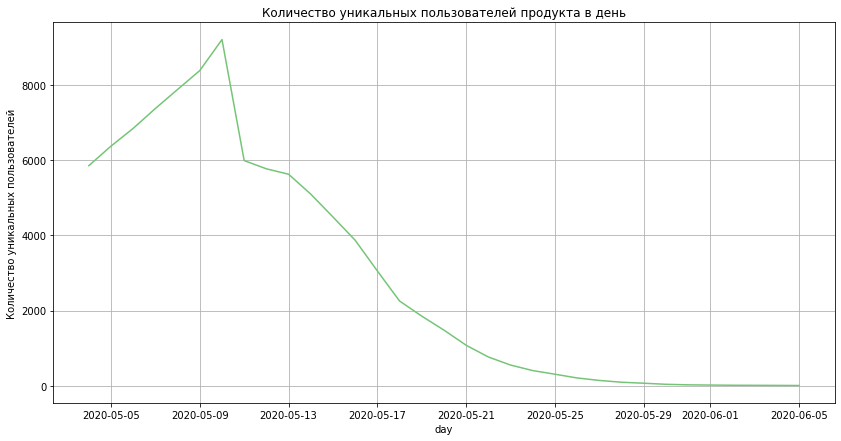

In [9]:
#Среднее количество пользователей продукта в день (метрика DAU):
dau_total = game_actions.groupby('day').agg({'user_id':'nunique'})           
print('\x1b[1;94m'+'Количество уникальных пользователей продукта в день:'+'\x1b[0m', int(dau_total.mean()))


#Среднее количество пользователей продукта в неделю (метрика WAU):
wau_total = game_actions.groupby('week').agg({'user_id':'nunique'}).mean()           
print('\x1b[1;94m'+'Количество уникальных пользователей продукта в неделю:'+'\x1b[0m', int(wau_total))


#Среднее количество пользователей продукта в месяц (метрика MAU):
mau_total = game_actions.groupby('month').agg({'user_id':'nunique'}).mean()          
print('\x1b[1;94m'+'Количество уникальных пользователей продукта в месяц:'+'\x1b[0m', int(mau_total))
print('')
    
sticky_wau = ((dau_total.mean()) / wau_total)
sticky_mau = ((dau_total.mean()) / mau_total)
print('\x1b[1;31m'+'Вовлеченность аудитории за неделю: {:.2%}'.format(sticky_wau[0])+'\x1b[0m')
print('\x1b[1;31m'+'Вовлеченность аудитории за месяц: {:.2%}'.format(sticky_mau[0])+'\x1b[0m')


plt.figure(figsize=(14,7))
plt.title("Количество уникальных пользователей продукта в день")
plt.ylabel('Количество уникальных пользователей')
plot=sns.lineplot(data = dau_total, legend=False, palette="Greens_r")
plot.grid(True)

<div style="border:solid gray 1px; padding: 20px">
  
  За период с 5 мая по 6 июня 2020 года:
    
  Количество уникальных пользователей игры в день - 2884. Пик пользователей был - 10 мая. После этого показатель пошел на спад.
      
  Количество уникальных пользователей игры в неделю: 6019
      
  Количество уникальных пользователей игры в месяц: 6802
    
Регулярность использования мобильной игры - 42%. Это показатель на хорошем уровне, так как в среднем по играм он составляет 18%. Пользовательская база стабильна, с большой вероятностью новый привлеченный игрок останется.
Источник: 
    
https://app2top.ru/marketing/devtodev-regulyarnost-vhodov-vazhnejshij-pokazatel-monetizatsii-igry-55693.html

### Анализ источников трафика. Доля пользователей из каждого источника.

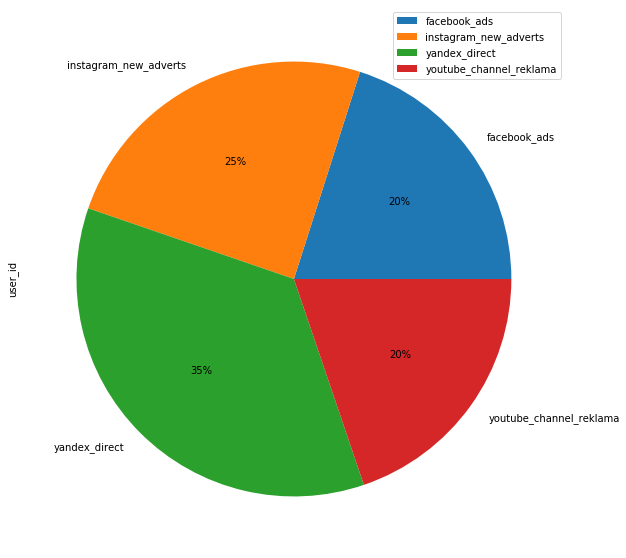

In [10]:
users_by_source = user_source.groupby('source').agg({'user_id':'nunique'}).reset_index()

plot = users_by_source.plot.pie(x='source', y='user_id', figsize=(10, 10), autopct="%1.0f%%", labels = users_by_source['source'])

<div style="border:solid gray 1px; padding: 20px">
    
Большинство пользователей пришло с источника - Yandex Direct (около 35%). Следующий по доле источник - Instagram new advert - 25%, затем Facebook_ads и Youtube_chennel_reklama (около 20 %).     

### Анализ поведения пользователей в игре. 

#### Доля каждого события в игре.

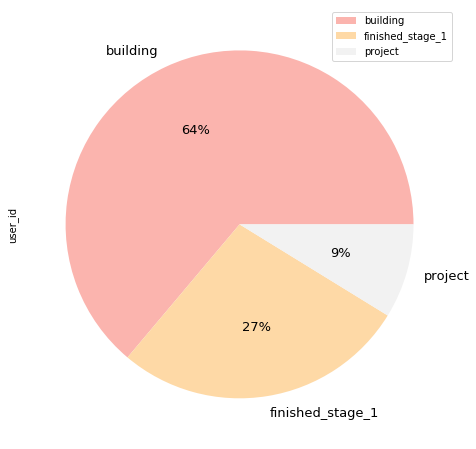

In [11]:
pivot = game_actions.groupby('event').agg({'user_id':'nunique'})

plot=pivot.plot(kind='pie',subplots=True,fontsize=13,figsize=(30,8),colormap='Pastel1',legend=True, autopct="%1.0f%%")

<div style="border:solid gray 1px; padding: 20px">

64% пользователей находятся на стадии строительства зданий. 27% завершили первый уровень, одержав победу над врагом и 9 % пользователей реализовали проект (построили три типа здания).

#### Распределение событий в игре по дням

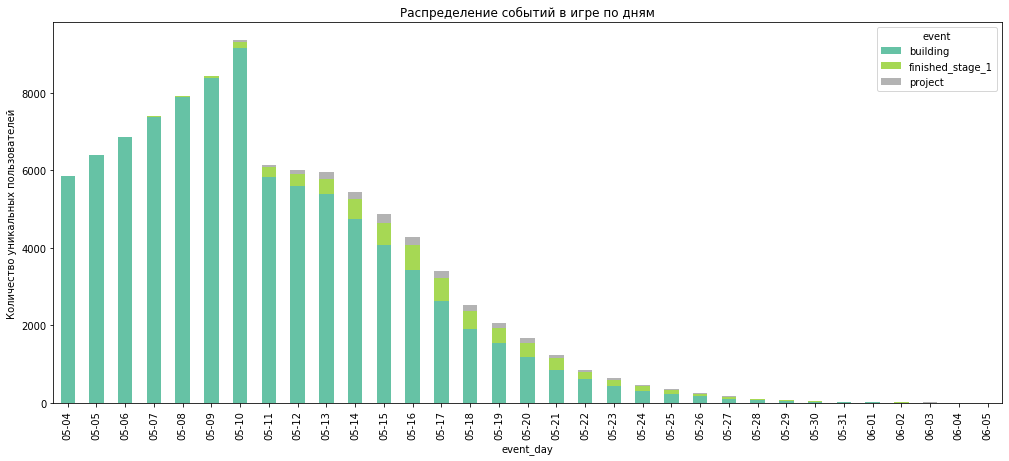

In [12]:
game_actions['event_day'] = game_actions['event_datetime'].astype('datetime64[D]')

game_actions_for_plot = game_actions.copy(deep=True)

game_actions_for_plot['event_day'] = game_actions['event_datetime'].astype('datetime64[D]').dt.strftime('%m-%d')

game_actions_pivot = game_actions_for_plot.pivot_table(index = 'event_day', columns = 'event', values='user_id',aggfunc='nunique')

plot =  game_actions_pivot.plot.bar(stacked=True, fontsize=10,figsize=(17,7),colormap='Set2')
plt.ylabel('Количество уникальных пользователей')
plt.title('Распределение событий в игре по дням')
plt.show()

<div style="border:solid gray 1px; padding: 20px">
    
Из графика видно,что в основном большая часть пользователей занимается строительством объектов. С 10 мая появляется заметный процент пользователей, кто прошел игру , одержав победу над врагом. С 14 по 17 мая больше всего пользователей проходили первый уровень. 

#### Доля построенных объектов

,building_type,user_id
0,spaceport,59325
1,assembly_shop,54494
2,research_center,14138


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e53041050>],
      dtype=object)

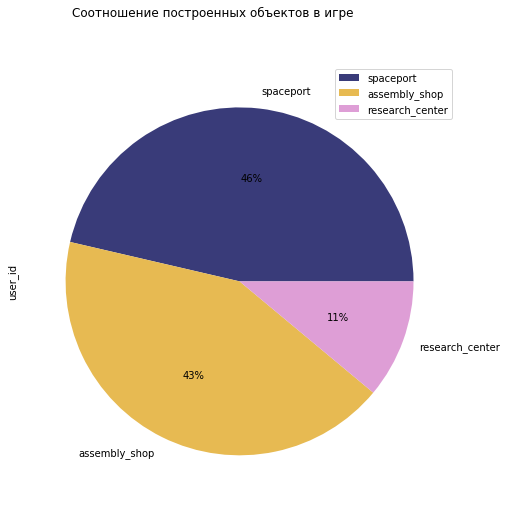

In [13]:
action_building = game_actions.query('event == "building"')

action_building_count = action_building.groupby('building_type').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)
display(action_building_count.reset_index())


action_building_count.plot(kind='pie',figsize = [30,8], title = 'Соотношение построенных объектов в игре',
                colormap='tab20b', subplots=True, autopct="%1.0f%%")


<div style="border:solid gray 1px; padding: 20px">

Пользователи чаще всего строят или космопорт, или сборочный цех (46% и 43%). Меньше всего удаётся пользователям построить исследовательский центр - всего 11%. 

#### Распределение построенных объектов в игре по дням

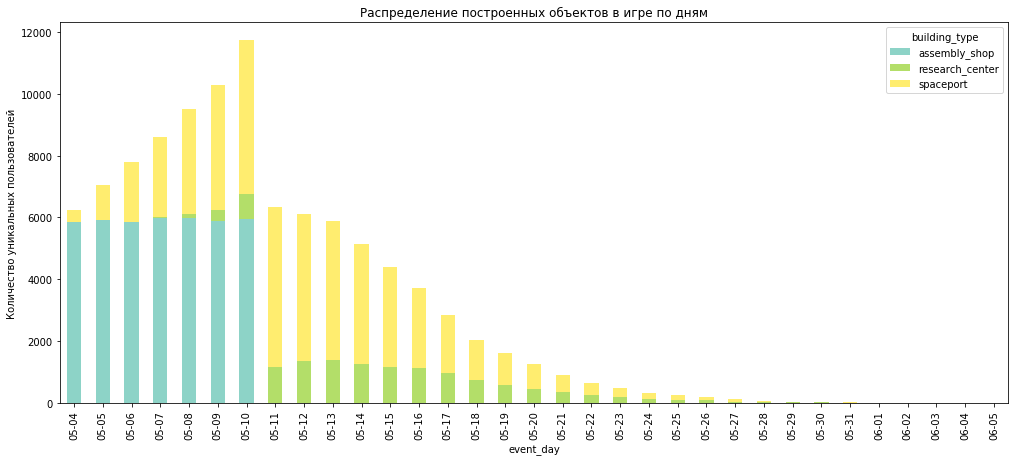

In [14]:
action_building['event_day'] = action_building['event_day'].astype('datetime64[D]').dt.strftime('%m-%d')
action_building = action_building.pivot_table(index = 'event_day', columns = 'building_type', values='user_id',aggfunc='nunique')
plot =  action_building.plot.bar(stacked=True, fontsize=10,figsize=(17,7),colormap='Set3')
plt.ylabel('Количество уникальных пользователей')
plt.title('Распределение построенных объектов в игре по дням')
plt.show()

<div style="border:solid gray 1px; padding: 20px">

Сперва пользователи приступают к построению сборочного цеха и космопорта, и только после этого начинают строить исследовательский центр. Можно предположить, что строительство сборочного цеха - это самое легкое задание на первом уровне, а постройка исследовательского центра наиболее сложное и трудозатратное. Также возможно, что доступ к строительству исследовательского центра можно получить только после строительства космопорта и сборочного цеха. 


### Подсчет времени, прошедшего с момента первой сессии до прохождения первого уровня

In [15]:
#Создание столбца с информацией о первой игровой сессии:
first_event_datetime = game_actions.groupby(['user_id'])['event_datetime'].min()
first_event_datetime.name = 'first_event_datetime'
game_actions = game_actions.join(first_event_datetime, on='user_id')

#### Подсчет времени, прошедшего с момента первой сессии до прохождения первого уровня, завершив проект

In [16]:
#Отфильтруем датасет по событию project 
complete_level_actions_project = game_actions.query('event == "project"')

#Время прохождение уровня 
complete_level_pr = complete_level_actions_project.groupby(['user_id']).agg({'event_datetime':'min'}).reset_index()
complete_level_pr.columns = ['user_id','complete_level_time']

#Объединение таблиц
complete_level_df_pr = complete_level_pr.merge(complete_level_actions_project, how='left', on ='user_id')

#Разница между первой сессией и прохождением первого уровня для каждого пользователя
complete_level_df_pr['day_before_complete_level'] = (complete_level_df_pr['complete_level_time'] - complete_level_df_pr['first_event_datetime']) / np.timedelta64(1,'D')

print('Среднее время с первой сессии до завершения 1 уровня: {} дней'.format(int(complete_level_df_pr['day_before_complete_level'].mean())))
print('Медиана времени с первой сессии до завершения 1 уровня: {} дней'.format(int(complete_level_df_pr['day_before_complete_level'].median())))


Среднее время с первой сессии до завершения 1 уровня: 11 дней
Медиана времени с первой сессии до завершения 1 уровня: 11 дней


#### Подсчет времени, прошедшего с момента первой сессии до прохождения первого уровня, одержав победу над врагом

In [17]:
#Отфильтруем датасет по событию finished_stage_1
complete_level_actions_fs1 = game_actions.query('event == "finished_stage_1"')

#Время прохождение уровня 
complete_level_fs1 = complete_level_actions_fs1.groupby(['user_id']).agg({'event_datetime':'min'}).reset_index()
complete_level_fs1.columns = ['user_id','complete_level_time']

#Объединение таблиц
complete_level_df_won = complete_level_fs1.merge(complete_level_actions_fs1, how='left', on ='user_id')

In [18]:
list = set(complete_level_df_won['user_id']).intersection(set(complete_level_df_pr['user_id']))

complete_level_df_won = complete_level_df_won.query('user_id not in @list')

In [19]:
#Разница между первой сессией и прохождением первого уровня для каждого пользователя
complete_level_df_won['day_before_complete_level'] = (complete_level_df_won['complete_level_time'] - complete_level_df_won['first_event_datetime']) / np.timedelta64(1,'D')


print('Среднее время с первой сессии до завершения 1 уровня: {} дней'.format(int(complete_level_df_won['day_before_complete_level'].mean())))
print('Медиана времени с первой сессии до завершения 1 уровня: {} дней'.format(int(complete_level_df_won['day_before_complete_level'].median())))

Среднее время с первой сессии до завершения 1 уровня: 11 дней
Медиана времени с первой сессии до завершения 1 уровня: 10 дней


Text(0.5, 1.0, "Сравнение времени, затраченного на прохождение первого уровня разными способами'")

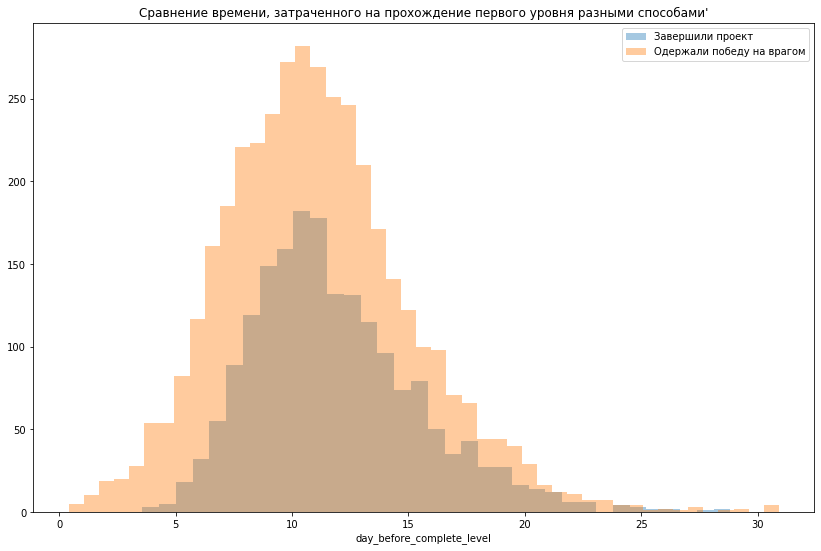

In [20]:
plt.figure(figsize=(14, 9))
sns.distplot(complete_level_df_pr['day_before_complete_level'],kde=False)
sns.distplot(complete_level_df_won['day_before_complete_level'], kde=False)
plt.legend(['Завершили проект','Одержали победу на врагом'])
plt.title("Сравнение времени, затраченного на прохождение первого уровня разными способами'")

<div style="border:solid gray 1px; padding: 20px">
    
Как было до этого сказано, пользователей, которые прошли первый уровень, одержав победу над врагом, больше,чем тех, кто прошел 1 уровень, завершив проект. Чаще всего в обеих группах пользователи завершают первый уровень за 11 дней. Есть пользователи, которые одерживали победу над врагом на 1-2 дни игры. Пользователи, которые занимались строительством заканчивали уровень не раньше 4 дня. Прохождение первого уровня раньше 5 дней и после 20 - аномальны.   

### Когортный анализ по количеству построенных объектов на пользователя

In [21]:
game_actions['first_day'] = game_actions['first_event_datetime'].astype('datetime64[D]')

last_day = game_actions.groupby(['user_id'])['event_datetime'].max().astype('datetime64[D]')
last_day.name = 'last_day'
game_actions = game_actions.join(last_day, on='user_id')

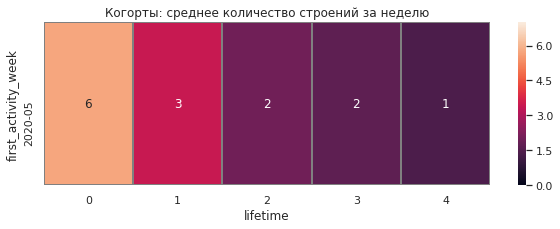

In [22]:
game_actions_building = game_actions.query('event=="building"')

game_actions_building ['activity_week'] = pd.to_datetime(game_actions_building ['event_day'], unit='d') - pd.to_timedelta(game_actions_building ['event_day'].dt.dayofweek, unit='d')
game_actions_building ['first_activity_week'] = pd.to_datetime(game_actions_building ['first_day'], unit='d') - pd.to_timedelta(game_actions_building ['first_day'].dt.dayofweek, unit='d') 


game_actions_building ['lifetime'] = game_actions_building ['activity_week'] - game_actions_building ['first_activity_week']
game_actions_building ['lifetime'] = game_actions_building ['lifetime'] / np.timedelta64(1,'W')
game_actions_building ['lifetime'] = game_actions_building ['lifetime'].astype('int') 


building_by_cohorts = game_actions_building.groupby(['first_activity_week', 'lifetime']).agg({'user_id':['count', 'nunique']}).reset_index()
building_by_cohorts.columns = ['first_activity_week', 'lifetime', 'building_total', 'users_total']

building_by_cohorts['building_per_user'] = building_by_cohorts['building_total'] / building_by_cohorts['users_total']
building_by_cohorts['first_activity_week'] = building_by_cohorts['first_activity_week'].dt.strftime('%Y-%m')


sns.set(style='whitegrid')
plt.figure(figsize=(10, 3))
plt.title('Когорты: среднее количество строений за неделю')
sns.heatmap(building_by_cohorts.pivot_table(index='first_activity_week',
                                                  columns='lifetime',
                                                  values='building_per_user',
                                                  aggfunc='mean'), annot=True, fmt='.0f', linewidths=1, linecolor='gray',vmin=0, vmax=7);


<div style="border:solid gray 1px; padding: 20px">

Т.к. данные доступны за период с 4 мая по 5 июня, решено формировать когорты за неделю. В основном, пользователи заканчивают строительство трех объектов в первую неделю, во вторую и третью им удаётся построить по два объекта. 

### Расчет Retention Rate для пользователей, которые не прошли первый уровень.  

,first_activity_week,lifetime,user_id,cohort_users,retention
0,05-04,0,13576,13576,1.000000
1,05-04,1,11980,13576,0.882440
2,05-04,2,3961,13576,0.291765
3,05-04,3,437,13576,0.032189
4,05-04,4,22,13576,0.001621


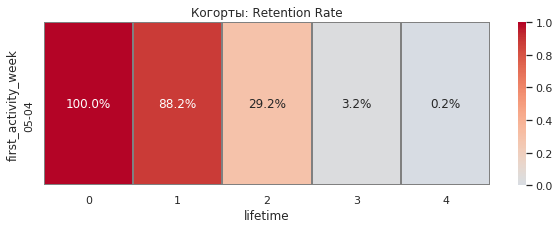

In [23]:
cohorts = game_actions_building.groupby(['first_activity_week','lifetime']).agg({'user_id':'nunique'}).reset_index() 


initial_users_count = cohorts[cohorts['lifetime'] == 0][['first_activity_week','user_id']]

initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'}) 

cohorts = cohorts.merge(initial_users_count,on='first_activity_week') 
cohorts['first_activity_week'] = cohorts['first_activity_week'].dt.strftime('%m-%d')

cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users'] 

retention_pivot = cohorts.pivot_table(index='first_activity_week',columns='lifetime',values='retention',aggfunc='sum') 
display(cohorts)


sns.set(style='white')
plt.figure(figsize=(10, 3))
plt.title('Когорты: Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray',vmin = 0 ,vmax=1, center= 0.04,cmap='coolwarm');

<div style="border:solid gray 1px; padding: 20px">
    
Из тепловой карты видно, что если пользователь не успел завершить первый уровень за первые две недели, то очень маловероятно, что он вернётся. 

### Анализ затрат на источники трафика

#### Сколько потрачено всего на источники трафика и на каждый источник в отдельности.

In [24]:
print('\x1b[1;94m'+'Всего потрачено на источники:'+'\x1b[0m')

print(ad_costs['cost'].sum().round())

Всего потрачено на источники:
7604.0


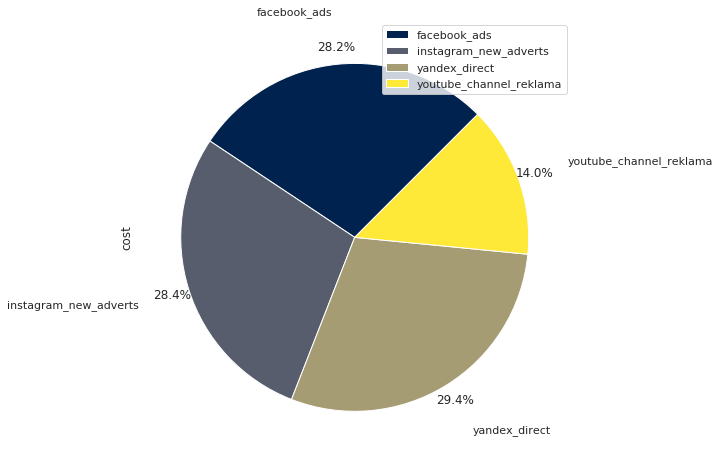

In [25]:
ad_costs.groupby('source').sum().plot(kind='pie', y='cost', autopct='%1.1f%%', figsize = (8, 8), legend=True, startangle=45,
                                      pctdistance=1.1, labeldistance=1.3, colormap='cividis')

<div style="border:solid gray 1px; padding: 20px">

Всего на привлечение пользователей потратили 7604. При этом почти поровну денег было вложено в три источника - Yandex, Facebook и Instagram. На рекламу на ютубе затрачено было меньше всего - 14%.

#### Стоимость привлечения клиента (САС).

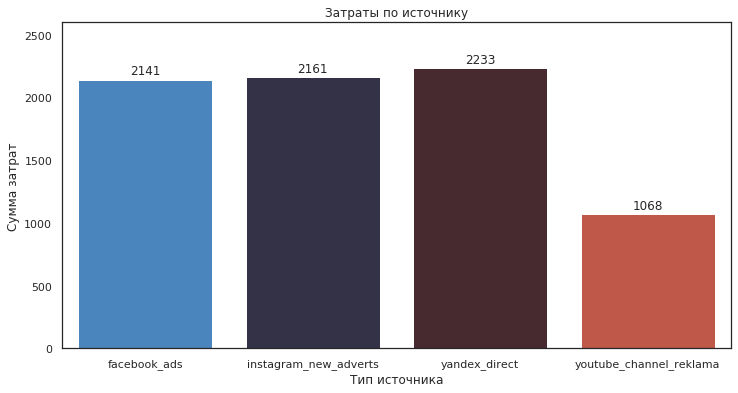

In [26]:
costs_by_source = ad_costs.groupby('source').agg({'cost':'sum'}).reset_index()

plt.figure(figsize = [12,6])
plot = sns.barplot(x="source", y="cost", data=costs_by_source, palette='icefire')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.title('Затраты по источнику')
plot.set_xlabel('Тип источника')
plot.set_ylabel('Сумма затрат')
plt.ylim(0, 2600)
plt.show()

(0, 6000)

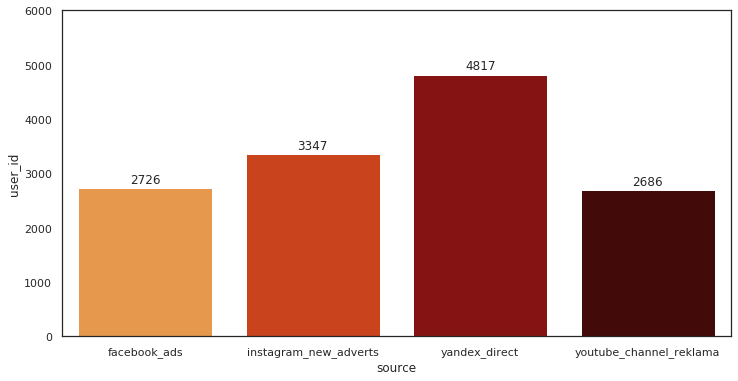

In [27]:
users_by_source = user_source.groupby('source').agg({'user_id':'nunique'}).reset_index()


plt.figure(figsize = [12,6])
plot = sns.barplot(x="source", y="user_id", data=users_by_source, palette='gist_heat_r')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.ylim(0, 6000)

In [28]:
cac = users_by_source.merge(costs_by_source, on='source').reset_index()
cac['cac'] = cac['cost'] / cac['user_id']
display(cac)

,index,source,user_id,cost,cac
0,0,facebook_ads,2726,2140.904643,0.785365
1,1,instagram_new_adverts,3347,2161.441691,0.645785
2,2,yandex_direct,4817,2233.111449,0.463590
3,3,youtube_channel_reklama,2686,1068.119204,0.397662


<div style="border:solid gray 1px; padding: 20px">
    
    Больше всего затрат уходит на источник Yandex, с него же и приходит самое большое количество пользователей. Примерно одинаковое количество затрат распределяется на Facebook и Instagram, но Facebook привлекает мало пользователей. 
    
    Дороже всего обходится привлечения клиента с источника - Facebook. Далее идёт Instagram и Yandex. Дешевле всего привлекать пользователя с Youtube.

#### Расчет минимальной стоимости рекламы, чтобы окупались затраты на привлечения пользователей

Т.к.  создатели игры планируют показывать её на экране выбором постройки, то сделаем срез по событию "объект построен", по периоду (с 3 по 9 мая) и посчитаем сколько раз было совершено это событие (просмотров рекламы).

In [29]:
start_date, end_date = '2020-05-03', '2020-05-10'

total_viewing_ads = len(game_actions.query('(event == "building") & (event_day >= @start_date and event_day < @end_date)'))
display(total_viewing_ads)

63086

Поделим сумму затрат на количество просмотров

In [30]:
display(ad_costs['cost'].sum() / total_viewing_ads)

0.12052716905158073

<div style="border:solid gray 1px; padding: 20px">
    
Стоимость за показ должна быть не меньше 0.12

##  Проверка статистической гипотезы различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

In [31]:
complete_level_actions_finished_stage_1 = game_actions.query('event == "finished_stage_1"')
complete_level_actions_finished_stage_1 = complete_level_actions_finished_stage_1.query('user_id not in @list')
complete_level_actions_finished_stage_1['lifetime'] = complete_level_actions_finished_stage_1['event_datetime'] - complete_level_actions_finished_stage_1['first_event_datetime']
complete_level_actions_finished_stage_1['lifetime'] = complete_level_actions_finished_stage_1['lifetime'].astype('timedelta64[D]').astype('int')
term_fs1=(complete_level_actions_finished_stage_1['event_datetime'].max()) - (complete_level_actions_finished_stage_1['event_datetime'].min())
display(term_fs1)
display(len(complete_level_actions_finished_stage_1))

complete_level_actions_project = game_actions.query('event == "project"')
complete_level_actions_project['lifetime'] = complete_level_actions_project['event_datetime'] - complete_level_actions_project['first_event_datetime']                                                                                                                                          
complete_level_actions_project['lifetime'] = complete_level_actions_project['lifetime'].astype('timedelta64[D]').astype('int')
term_pr=(complete_level_actions_project['event_datetime'].max()) - (complete_level_actions_project['event_datetime'].min())

complete_level_actions_finished_stage_1_mean = complete_level_actions_finished_stage_1.groupby('user_id')['lifetime'].mean().mean()
complete_level_actions_project_mean = complete_level_actions_project.groupby('user_id')['lifetime'].mean().mean()

display(complete_level_actions_finished_stage_1_mean)
display(complete_level_actions_project_mean)

Timedelta('31 days 16:45:20')

3951

10.606175651733738

11.392818863879958

In [32]:
complete_level_actions_finished_stage_1_ = complete_level_actions_finished_stage_1.query('event == "finished_stage_1"')['lifetime']
complete_level_actions_project_ = complete_level_actions_project = complete_level_actions_project.query('event == "project"')['lifetime']

Гипотеза №1 

Время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

H0  — Время прохождения одинаковое.

H1  — Время прохождения различается.

α=5%

In [33]:
#Проверка равенства дисперсий
variance_estimate_fs1 = np.var(complete_level_actions_finished_stage_1_, ddof=1)
print(variance_estimate_fs1)

variance_estimate_pr = np.var(complete_level_actions_project_, ddof=1)
print(variance_estimate_pr)

alpha = .05

results = st.ttest_ind(
    complete_level_actions_finished_stage_1_, 
    complete_level_actions_project_,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

16.86005299091081
13.213439020255224
p-значение: 1.8471976323195476e-13
Отвергаем нулевую гипотезу


<div style="border:solid gray 1px; padding: 20px">
    
Применялся критерий Стьюдента для проверки равенства средних значений в двух выборках. Сначала проверялось равенство дисперсий. Т.к. они не равны, то параметр equal var в t-тесте  равен False. 
    
В группе, где пользователи заканчивают уровень через реализацию проекта на прохождение игры в среднем уходит 11 дней.
  
В группе, где пользователи заканчивают уровень победой над другим игроком в среднем уходит 10 дней. На 1 день быстрее.
    
P-value больше критического уровня статистической значимости , поэтому нулевая гипотеза о равенстве данных была отвергнута, в группах разное время прохождения первого уровня. В группе, которая заканчивает уровень через реализацию проекта, пользователя в среднем тратят на прохождение первого уровня больше времени.
     

## Общий вывод



Представлены данные: с информацией об источниках трафика пользователей; с итоговой стоимостью за клики, которая распределена по дням и источникам трафика; с информацией о событиях пользователей в игре за анализируемый период.Были обнаружены пропущенные данные, которые решено было игнорировать. 
    
  

Количество уникальных пользователей продукта в день: 2884 . Количество уникальных пользователей продукта в неделю: 6019.В месяц количество уникальных посетителей  6802. Вовлеченность аудитории за месяц: 42.41%

Пользователей, которые прошли первый уровень, одержав победу над врагом, больше,чем тех, кто прошел 1 уровень, завершив проект. Чаще всего в обеих группах пользователи завершают первый уровень за 11 дней. Есть пользователи, которые одерживали победу над врагом на 1-2 дни игры. Пользователи, которые занимались строительством заканчивали уровень не раньше 4 дня. Прохождение первого уровня раньше 5 дней и после 20 - аномальны. Пользователи чаще всего строят или космопорт, или сборочный цех (46% и 43%). Меньше всего удаётся пользователям построить исследовательский центр - всего 11%. В основном, пользователи заканчивают строительство трех объектов в первую неделю, во вторую и третью им удаётся построить по два объекта. 

Retention rate для игроков, которые на этапе строительства, на протяжении всего периода равномерно падает, что значит, что пользователи возвращаются в первую неделю и постепенно отпадают со временем. Максимальное значение метрики составило в первую неделю 88,2%. В последнюю неделю процент вернувшихся пользователей - 0.2.

Большинство пользователей пришло с источника - Yandex Direct (около 35%). Следующий по доле источник - Instagram new advert - 25%, затем Facebook_ads и Youtube_chennel_reklama (около 20 %). Почти поровну затрат приходится на три вида источника: яндекс, инстаграм и фейсбук .Больше всего затрат уходит на привлечение новых пользователей по источникам фейсбук и инстаграм. 

Проверили, значима ли статистически разница времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком. Нулевой гипотезой считали  равенство времени . Полученный p-value: 1.84 Нулевую гипотезу отвергли. Есть разница во времени.Группа, которая заканчивает уровень через реализацию проекта тратит на прохождение первого уровня больше времени.

Оптимальное время для запуска рекламы это первая неделя, когда как раз пользователи занимаются строительством объектов. Стоимость за показ должна быть не меньше 0.12, чтобы окупались затраты на привлечение клиентов. Стоит вкладываться в источник - Яндекс, т.к. оттуда больше всего пользователей, при этом затраты на привлечение одни из самых низких.